# Kaggle Competition: Titanic - Machine Learning from Disaster
# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df = pd.read_csv('train.csv')
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.set_index('PassengerId', inplace=True)

# The name of the passenger is unnecessary
train_df = train_df.drop('Name', axis=1)

train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### The Cabin column has too many empty values


In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# change 'Sex' to binary values
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

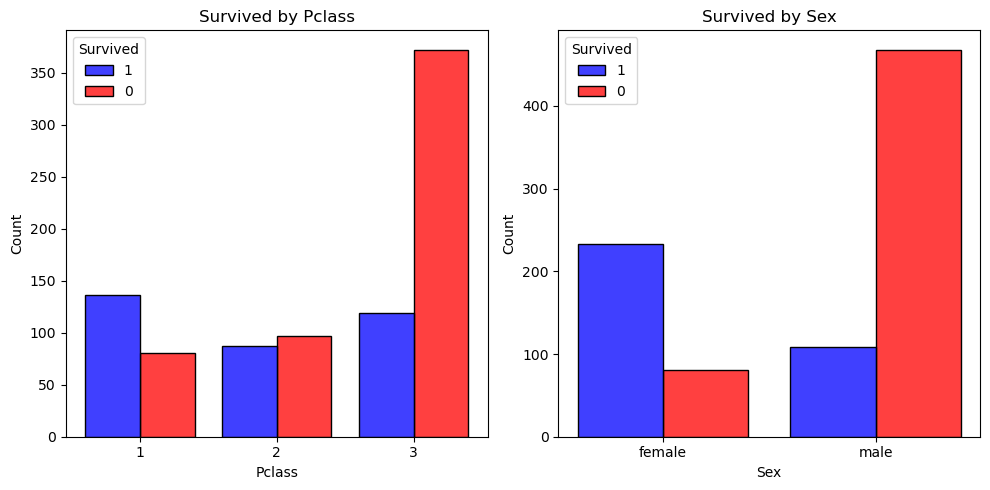

In [9]:
# check the impact of Pclass and Sex
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pclass
sns.histplot(
    data=train_df, x='Pclass', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    binwidth=1, discrete=True, shrink=0.8, ax=axs[0]
)
axs[0].set_xticks([1, 2, 3])
axs[0].set_title('Survived by Pclass')

# Sex
sns.histplot(
    data=train_df, x='Sex', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    discrete=True, shrink=0.8, ax=axs[1]
)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['female', 'male'])
axs[1].set_title('Survived by Sex')

plt.tight_layout()
plt.show()

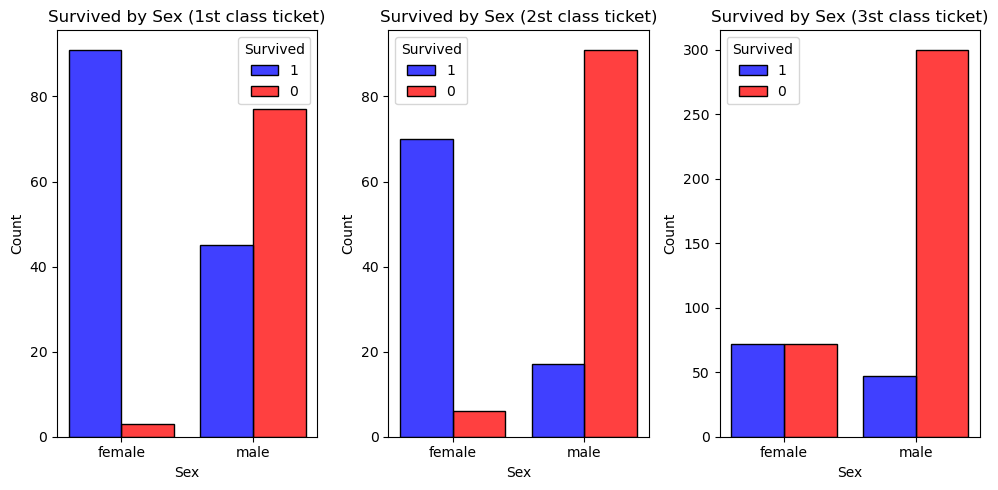

In [10]:
# further check the impact of Pclass and Sex
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

for pclass in range(1, 4):
    sns.histplot(
        data=train_df[train_df['Pclass'] == pclass], x='Sex',
        hue='Survived', hue_order=[1, 0], multiple='dodge',
        palette={1: 'blue', 0: 'red'}, discrete=True,
        shrink=0.8, ax=axs[pclass-1]
    )
    axs[pclass-1].set_title('Survived by Sex ({}st class ticket)'.format(pclass))
    axs[pclass-1].set_xticks([1, 0])
    axs[pclass-1].set_xticklabels(['male', 'female'])

plt.tight_layout()
plt.show()


### Pclass and Sex have a significant impact on survival

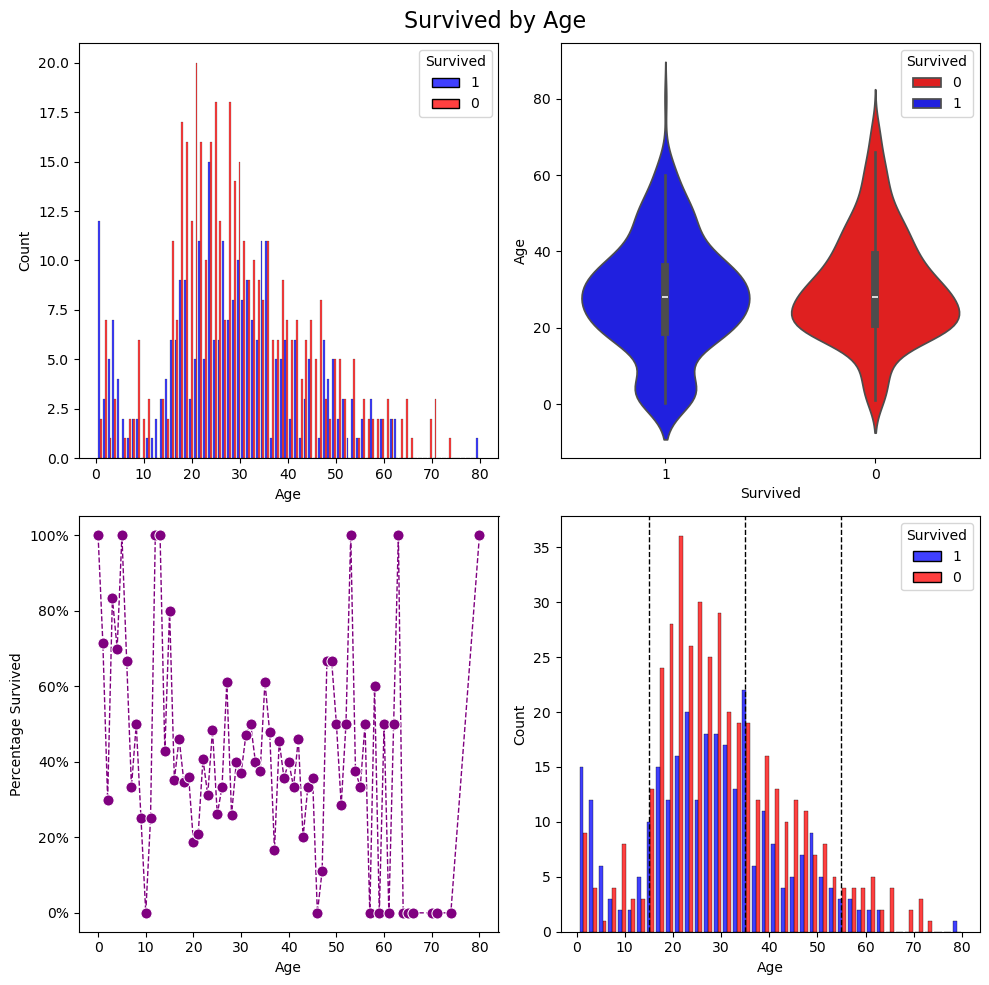

In [11]:
from matplotlib.ticker import FuncFormatter

# Check the impact of Age
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Regular histplot
sns.histplot(
    data=train_df, x='Age', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    binwidth=1,shrink=0.8, ax=axs[0, 0]
)

# Violinplot
sns.violinplot(
    data=train_df, x='Survived', y='Age', hue='Survived',
    order=[1, 0], palette={1: 'blue', 0: 'red'}, ax=axs[0, 1]
)

# Lineplot with survival percentage
# Prepare auxiliary df
age_survived_df = train_df[['Survived', 'Age']].dropna(subset=['Age'])
age_survived_df['Age'] = age_survived_df['Age'].astype(int)

# Calculate survival percentage by age
survived_in_percent_by_age_df = (
    age_survived_df.groupby('Age')['Survived']
    .mean()
    .reset_index()
    .rename(columns={'Survived': 'Survived_in_percent'})
)

sns.lineplot(
    data=survived_in_percent_by_age_df, x='Age', y='Survived_in_percent', ax=axs[1, 0],
    marker='o', color='purple', linestyle='--', markersize=8, linewidth=1
)

def percent_formatter(x, pos):
    return f'{x:.0%}'

formatter = FuncFormatter(percent_formatter)

axs[1, 0].yaxis.set_major_formatter(formatter)
axs[1, 0].set_ylabel('Percentage Survived')

# Histplot with separated age groups
sns.histplot(
    data=train_df, x='Age', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    binwidth=2, discrete=False, shrink=0.8, ax=axs[1, 1]
)
for age in [15, 35, 55]:
    axs[1, 1].axvline(x=age, color='black', linestyle='--', linewidth=1)

fig.suptitle('Survived by Age', fontsize=16)

plt.tight_layout()
plt.show()

### Age has impact on survival and can be divided into 4 groups

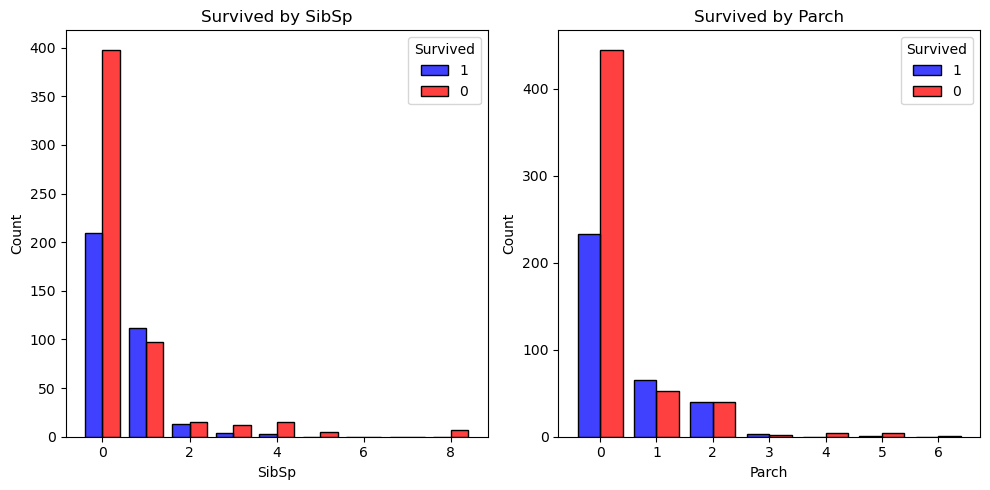

In [12]:
# Check the impact of SibSp and Parch
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# SibSp
sns.histplot(
    data=train_df, x='SibSp', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    discrete=True, shrink=0.8, ax=axs[0]
)
axs[0].set_title('Survived by SibSp')

# Parch
sns.histplot(
    data=train_df, x='Parch', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    discrete=True, shrink=0.8, ax=axs[1]
)
axs[1].set_title('Survived by Parch')

plt.tight_layout()
plt.show()

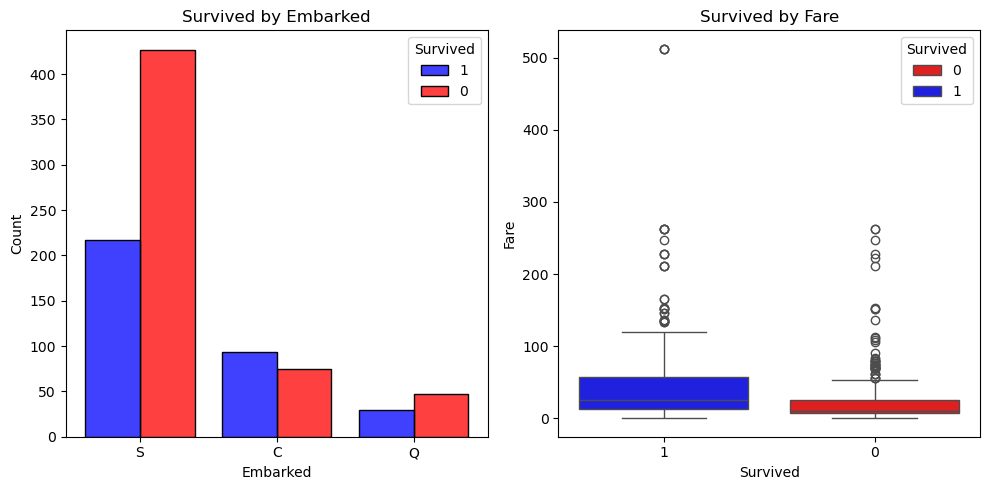

In [13]:
# Check the impact of Embarked and Fare
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Embarked
sns.histplot(
    data=train_df, x='Embarked', hue='Survived', hue_order=[1, 0],
    multiple='dodge', palette={1: 'blue', 0: 'red'},
    discrete=True, shrink=0.8, ax=axs[0]
)
axs[0].set_title('Survived by Embarked')

# Fare
sns.boxplot(
    data=train_df, x='Survived', y='Fare', hue='Survived',
    order=[1, 0], palette={1: 'blue', 0: 'red'}, ax=axs[1]
)
axs[1].set_title('Survived by Fare')

plt.tight_layout()
plt.show()

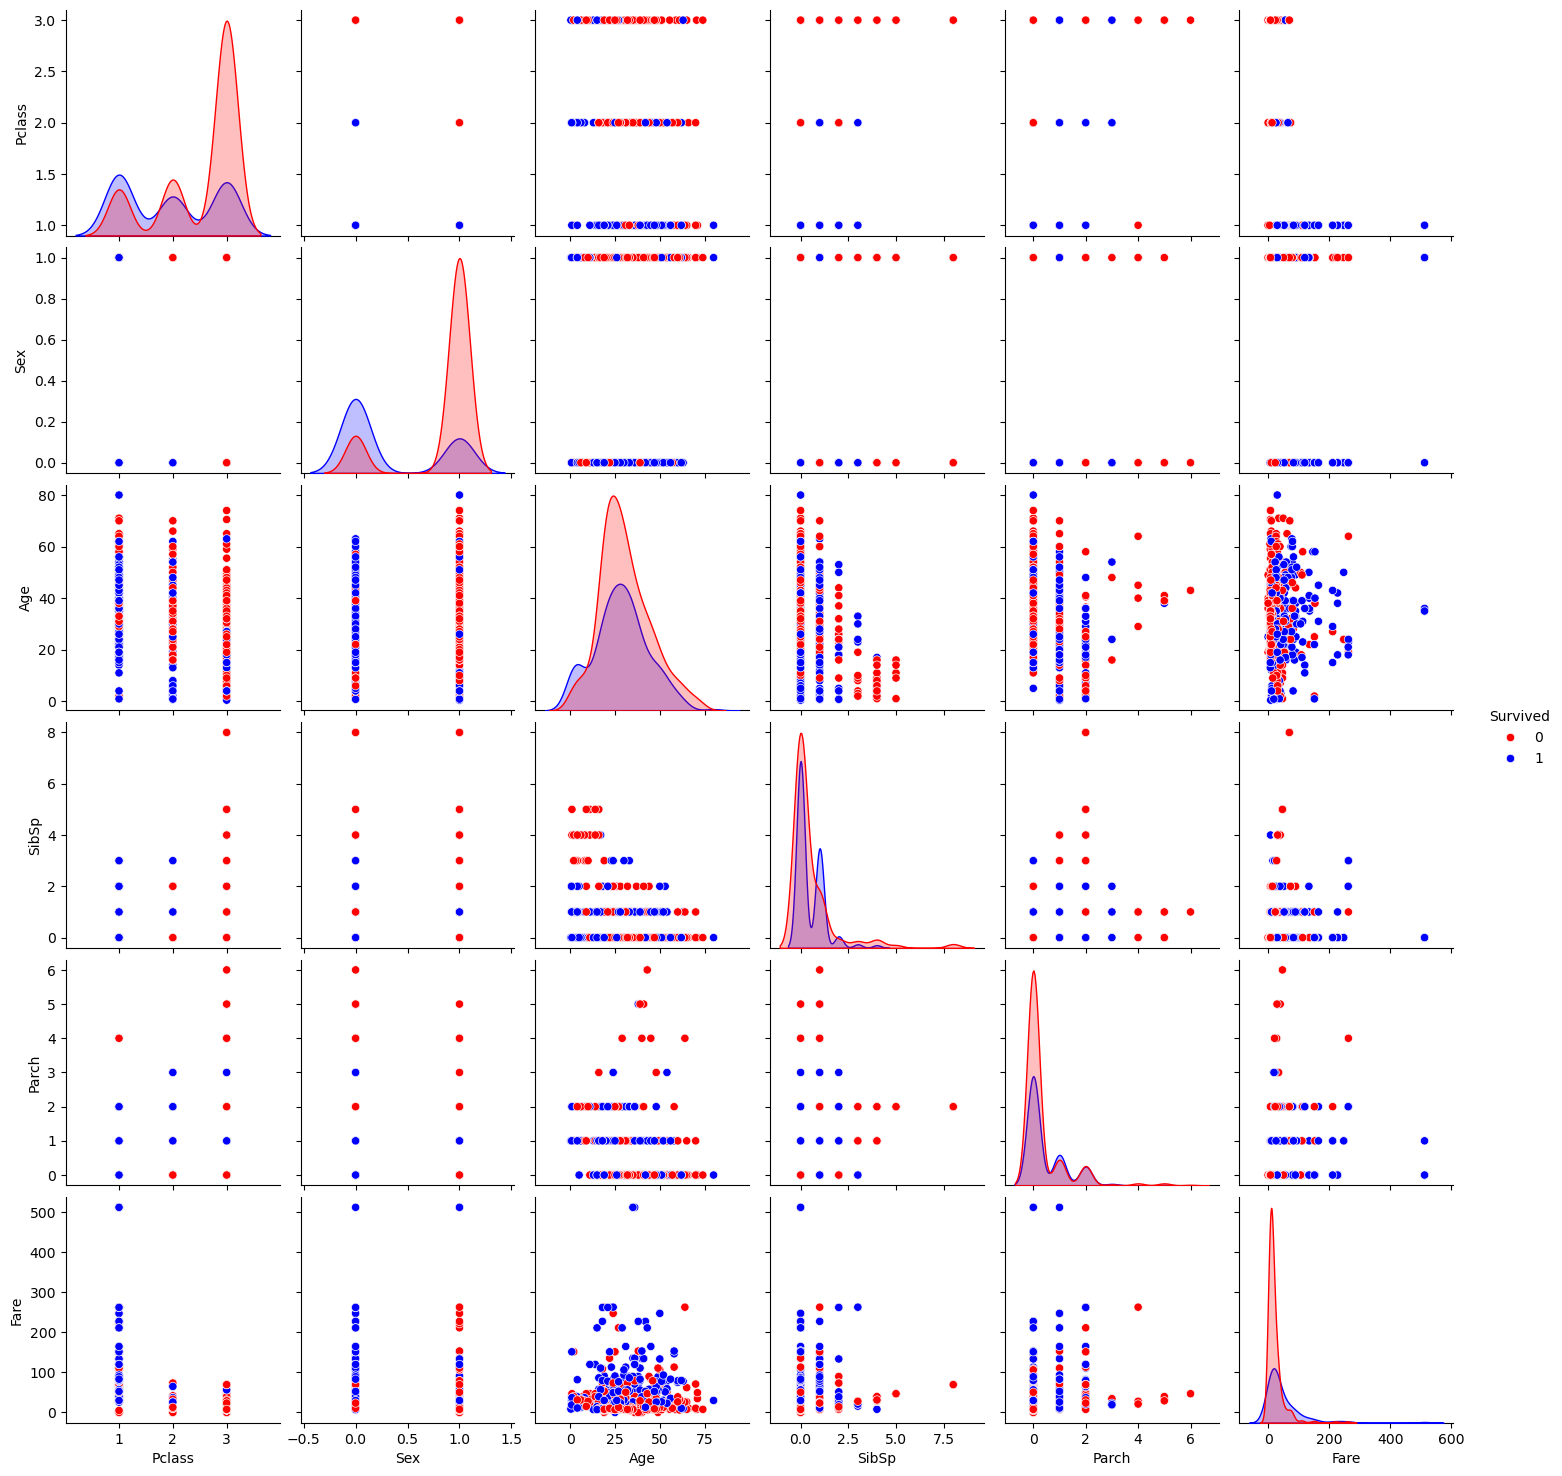

In [14]:
# Get an overall view of numeric variables
sns.pairplot(train_df, hue='Survived', palette={1: 'blue', 0: 'red'})
plt.show()

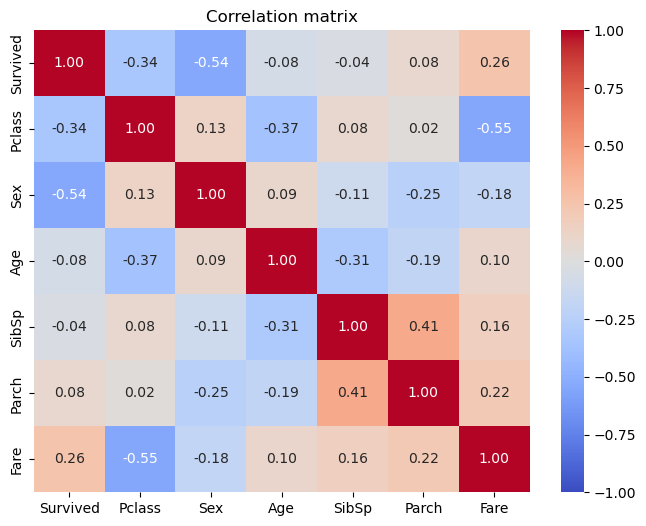

In [15]:
# Create correlation matrix
corr_df = train_df.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)
correlations = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()